In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Github image: NLD-ISALA-0093 frame 280
#Red thrombus image: NLD-AMPH-0063 frame 300
#White thrombus: NLD-RADB-0007 frame 273
#Post-processing results: NLD-ISALA-0097 frame 320

In [16]:
image = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\scans-DICOM\NLD-ISALA-0093.dcm')
image_pixel_data = sitk.GetArrayFromImage(image)

In [17]:
seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations-ORIGINALS\NLD-ISALA-0093.nii.gz')
seg_pixel_data = sitk.GetArrayFromImage(seg)

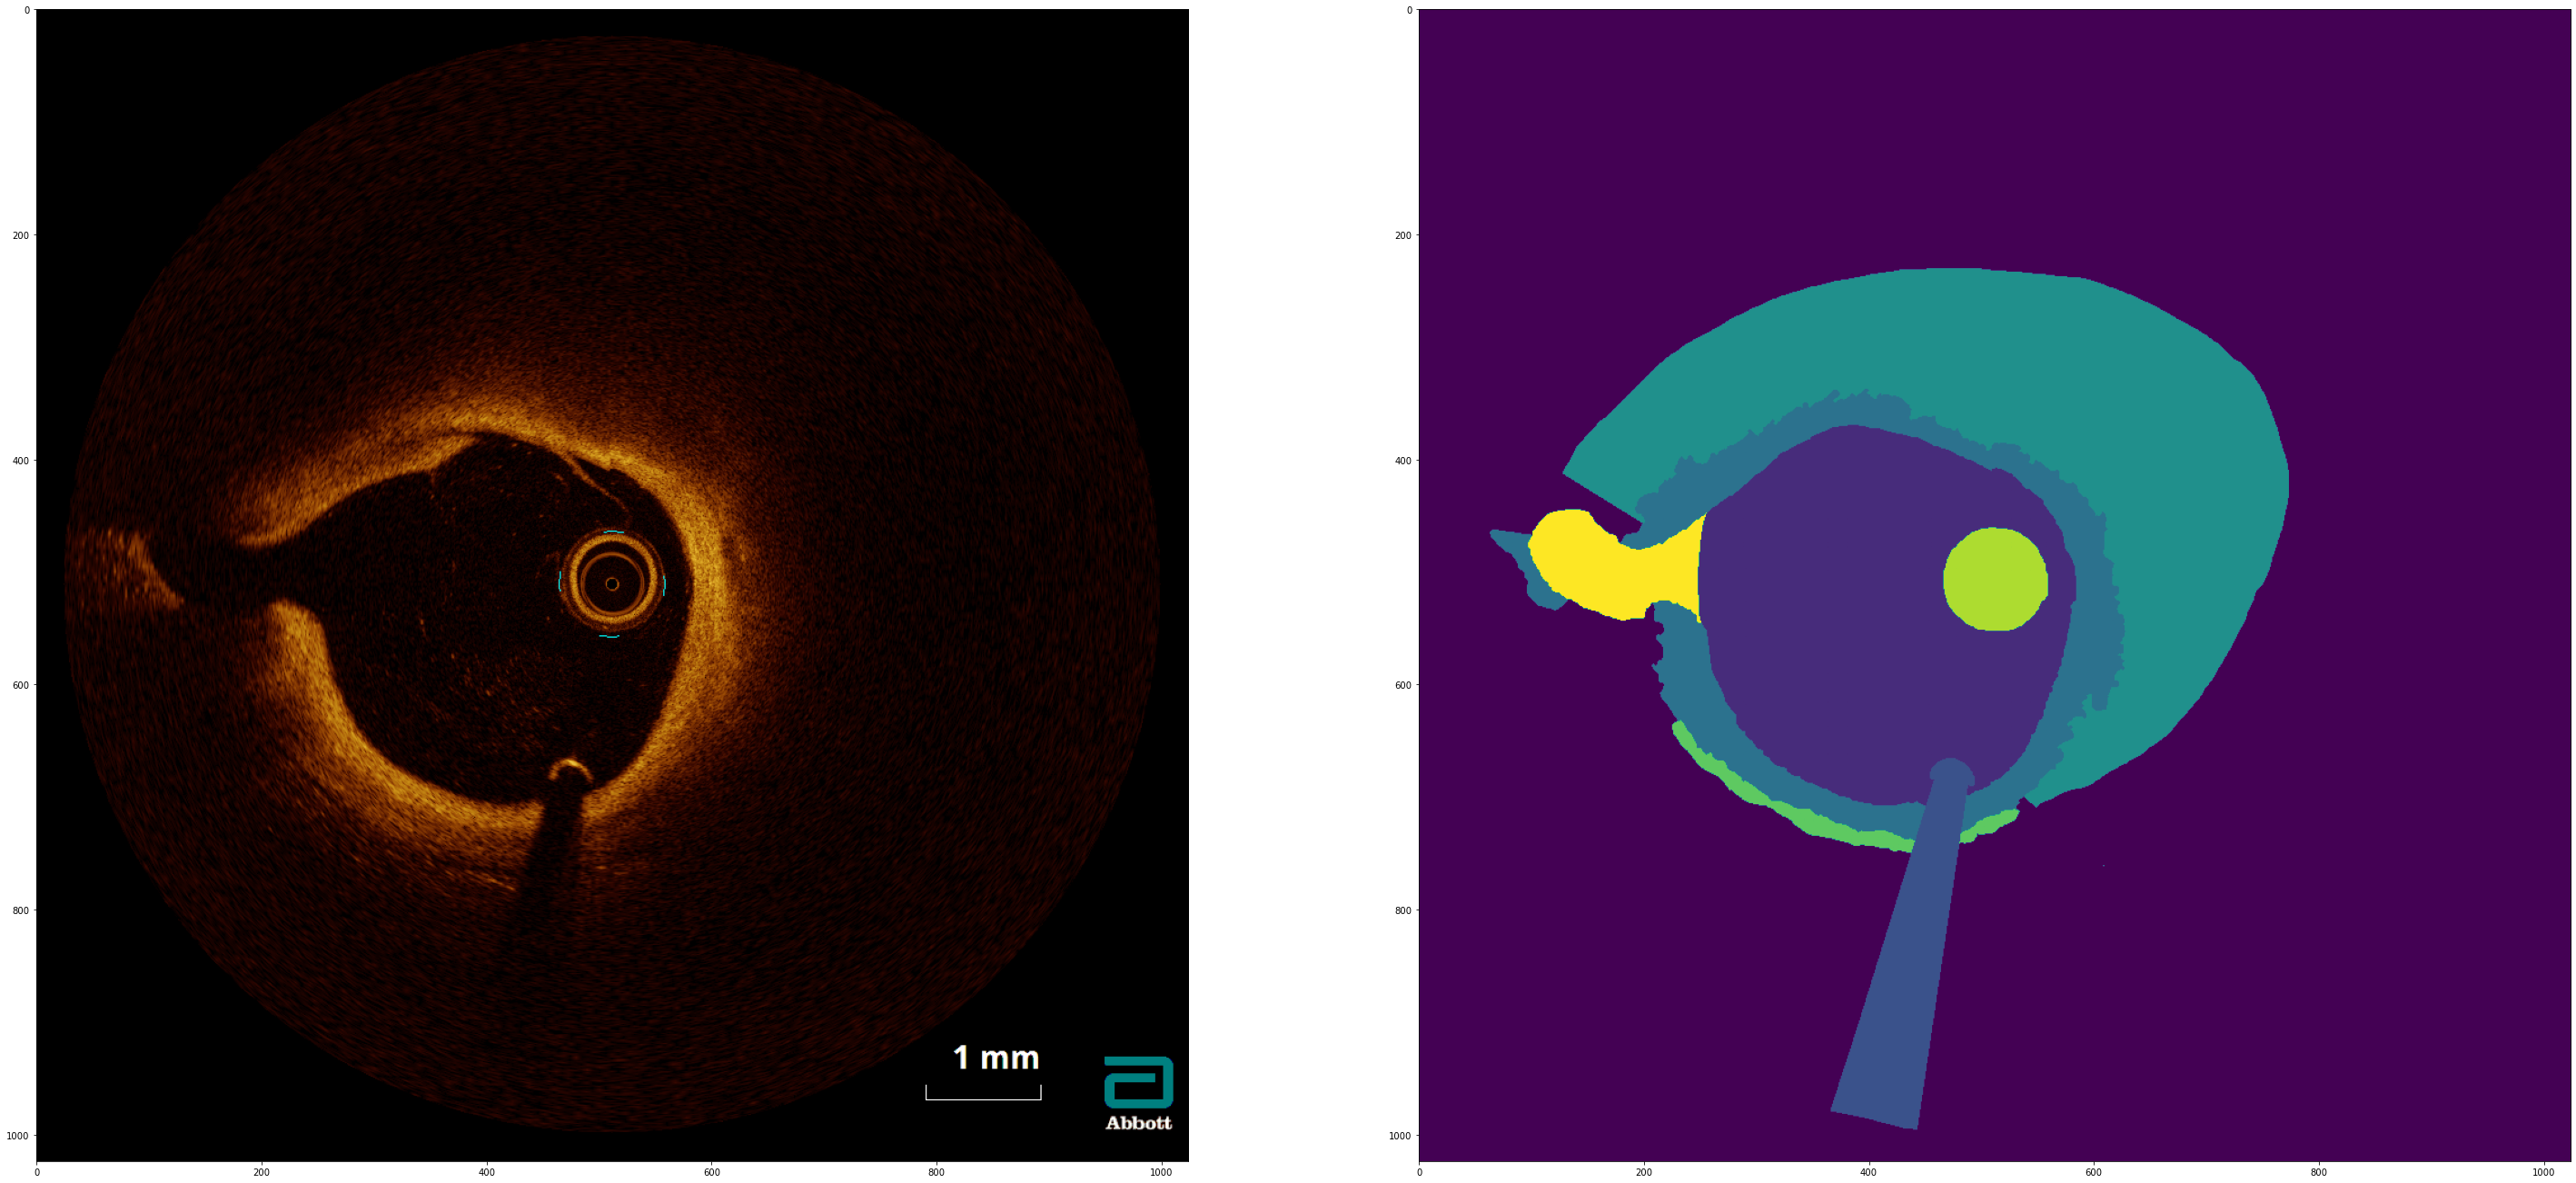

In [34]:
fig, axes = plt.subplots(1,2,figsize=(50,50))

frame = 280

axes[0].imshow(image_pixel_data[frame,:,:,:])
axes[1].imshow(seg_pixel_data[frame,:,:])